<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/oos_mse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [53]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial
from sklearn.model_selection import train_test_split

### **Read In Data Set**

In [54]:
df = pd.read_csv('/content/business-analytics/datasets/brookline.csv')
df.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


### **Ensure consistent categories**

In [55]:
# Ensure consistent categories
categorical_columns = ['beacon', 'buildingStyle', 'rooms', 'baseFloor', 'elevators', 'bedrooms', 'fullBathrooms', 'halfBathrooms', 'garage']  # List of categorical columns

for col in categorical_columns:
    df[col] = pd.Categorical(df[col])

### **Helper Functions**

In [56]:
def simulate(reg_formula, random_state):

  df_train, df_test = train_test_split(df, test_size=0.3, random_state=random_state)

  def get_MSE(reg_formula):
    linear_model = smf.ols(reg_formula, data=df_train)
    results = linear_model.fit()
    y_true = df_test[reg_formula.split('~')[0].strip()]
    predictions = results.predict(df_test)
    return np.sqrt((results.resid**2).mean()) -  np.sqrt(((y_true - predictions)**2).mean())

  return get_MSE(reg_formula)

### **Run Simulation**

In [57]:
random_states = range(1000)
reg_formula = 'size ~ C(beacon) + C(buildingStyle) + C(rooms) + C(baseFloor) + C(elevators) + C(bedrooms) + C(fullBathrooms) + C(halfBathrooms) + C(garage)'
results = np.array(list(map(partial(simulate, reg_formula), random_states)))

### **Plot**

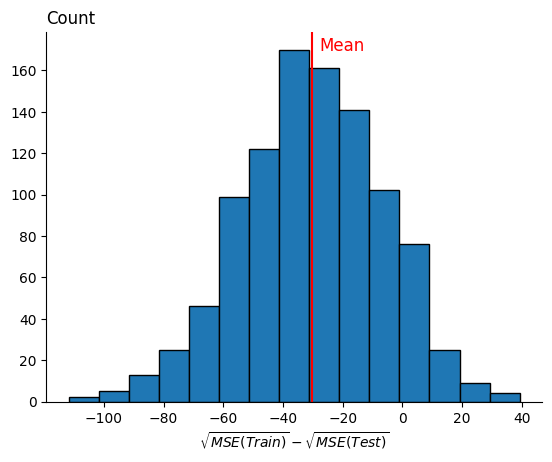

In [73]:
plt.hist(results, bins=15, edgecolor='black')
plt.axvline(np.mean(results), color='red')
plt.title('Count', loc='left')
plt.xlabel(r'$\sqrt{MSE(Train)} - \sqrt{MSE(Test)}$')
ax = plt.gca()
ax.text(0.55, 0.95, 'Mean', transform=ax.transAxes, fontsize=12, color='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()